<img src="https://octodex.github.com/images/labtocat.png" width=200 height=200 />

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv
/kaggle/input/heart-disease-dataset/heart.csv
/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv
/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv
/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv
/kaggle/input/heart-disease-data/heart_disease_uci.csv
/kaggle/input/d/yasserh/heart-disease-dataset/heart.csv
/kaggle/input/d/mirzahasnine/heart-disease-dataset/heart_disease.csv
/kaggle/input/d/mexwell/heart-disease-dataset/documentation.pdf
/kaggle/input/d/mexwell/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv
/kaggle/input/heart-disease-and-stroke-prevention/dataset.csv
/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv
/kaggle/input/heart-failure-prediction/heart.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Read Dataset

In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

# Data Info

In [4]:
# Display the first few rows of the dataframe
display(df.head(10))
print(20*"-","COLUMNS",20*"-",'\n',df.columns.tolist(),"\n\n",20*"-","INFO",20*"-")
display(df.info())
print(f"------------\nShape of dataframe: {df.shape}")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


-------------------- COLUMNS -------------------- 
 ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'] 

 -------------------- INFO --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3

None

------------
Shape of dataframe: (303, 14)


# Missing Data

In [5]:
# Check for missing & dublicate values
print(f"Missing Data :\n{df.isnull().sum()}")
print(f"---------------\nIndeces of dublicate values are : {df[df.duplicated(keep=False)].index}\n")

Missing Data :
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
---------------
Indeces of dublicate values are : Index([163, 164], dtype='int64')



# Exploratory Data Analysis (EDA)

In [6]:
# Explore the distribution of the target variable
target='output'
px.pie(df,names=target,title='Distribution of Heart Attack',labels={target:'Diagnosis'})

# Automatically detect binary variables
binary_vars = [col for col in df.columns if df[col].nunique() == 2]
for col in binary_vars:
    px.pie(df,names=col,title=f"Distribution of {col}")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

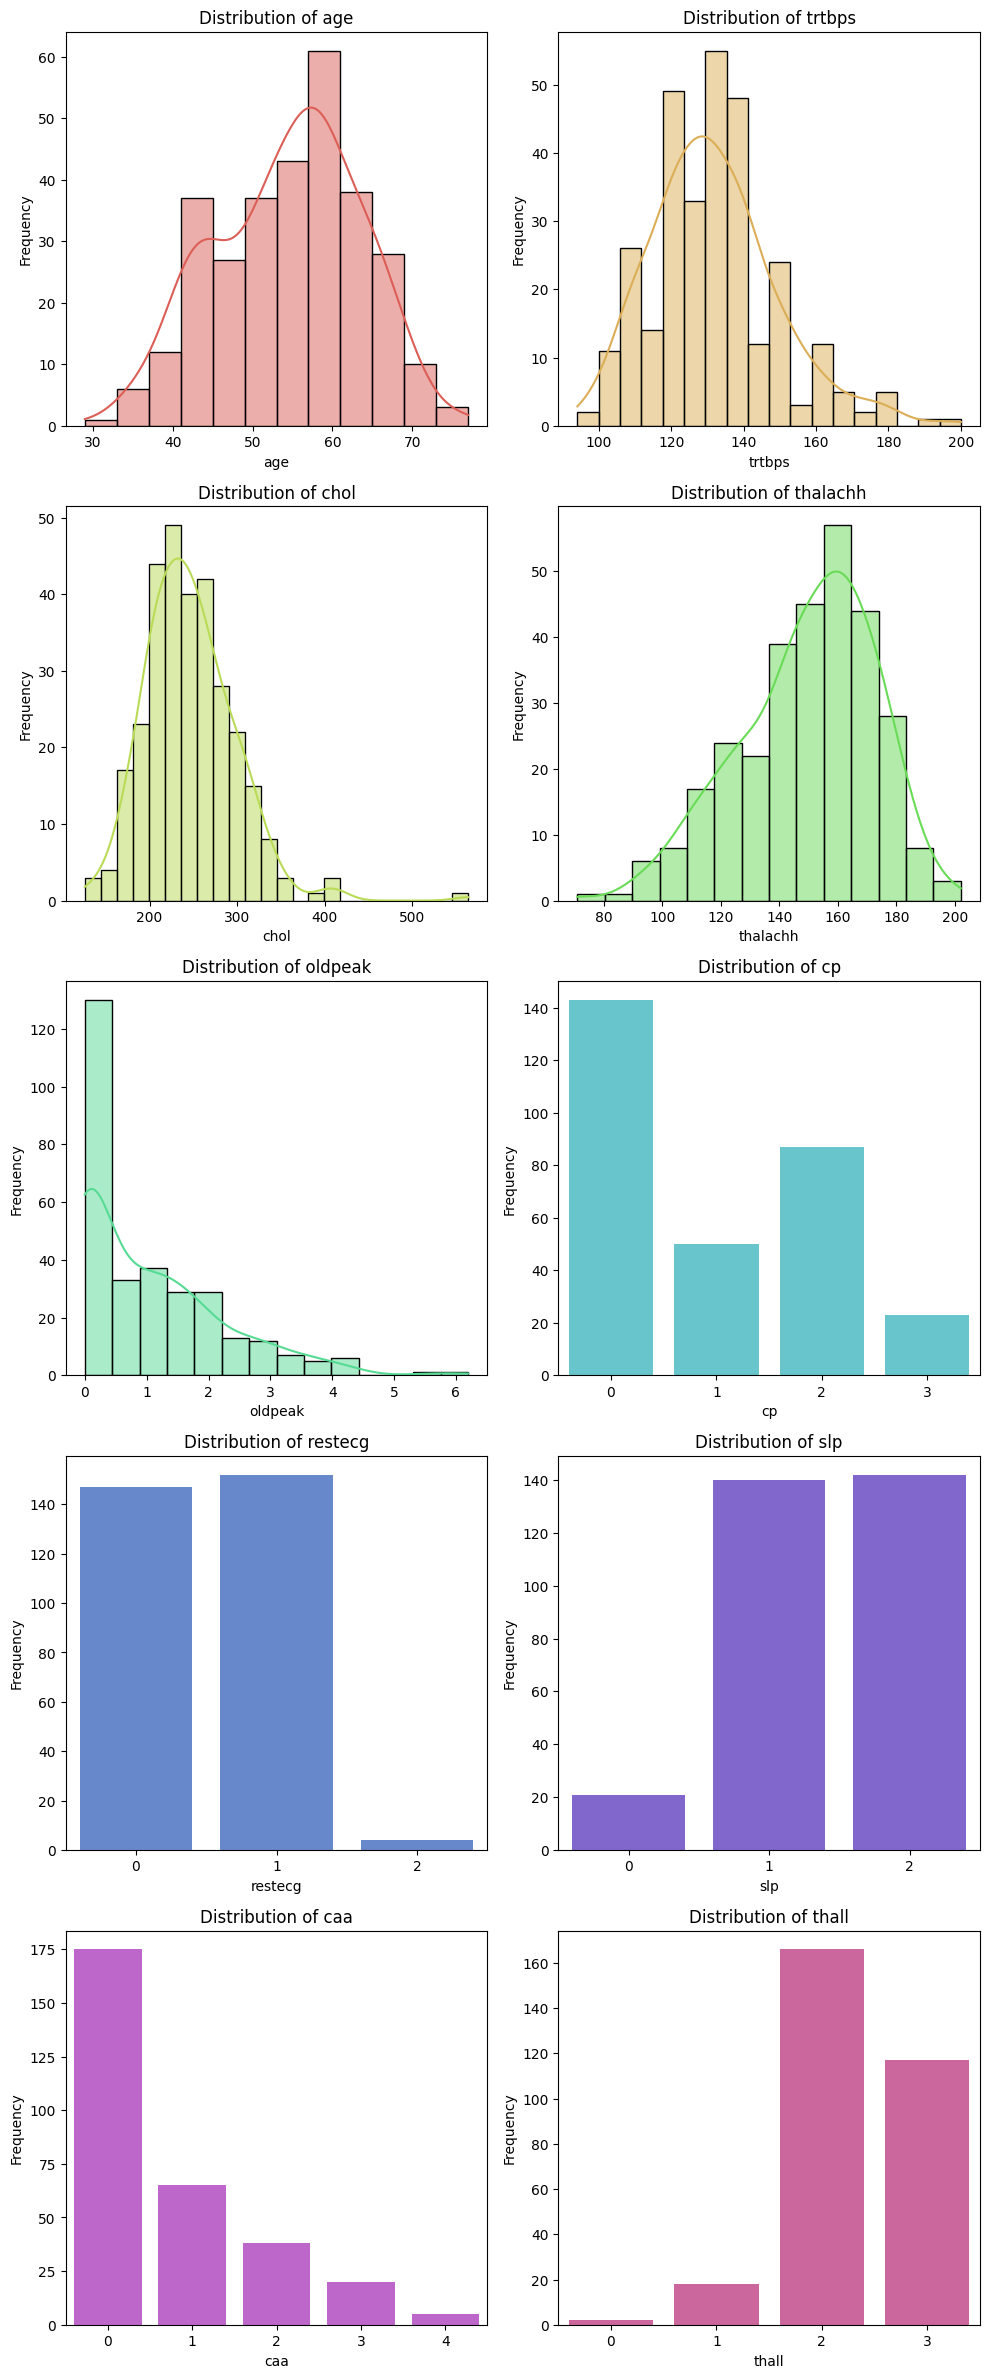

In [7]:
# Detect categorical variables (those with fewer than 11 unique values or already categorical)
categorical_vars = [col for col in df.columns if (df[col].nunique() < 11 and col not in binary_vars)]

# Columns to be scaled (excluding binary and categorical)
cols2scale = [col for col in df.columns if col not in binary_vars + categorical_vars]


# Combine columns to plot: numerical columns for histograms, categorical for bar plots
columns_to_plot = cols2scale + categorical_vars

# Number of subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 2  # This creates a grid with 2 columns

# Create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 4.7))
axes = axes.flatten()
colors = sns.color_palette("hls", num_cols)

# Loop through the columns to create histograms or bar plots
for i, col in enumerate(columns_to_plot):
    if col in categorical_vars:
        sns.countplot(x=col, data=df, ax=axes[i], palette=[colors[i]])
    else:
        sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The features trtbps, oldpeak and chol have distributions that are skewed, which means their data isn't symmetrically spread out. Instead, there's a bit of a lean to one side.

Outliers are values that are way off from the rest of the data points, like if most people's cholesterol levels are around 200, but then you have a few people with levels up near 400. These outliers can really affect our analysis and any models we build because they're so different from the typical values.

This skewness and the presence of outliers can affect how we analyze the data and how our models perform, so it's something to keep an eye on.

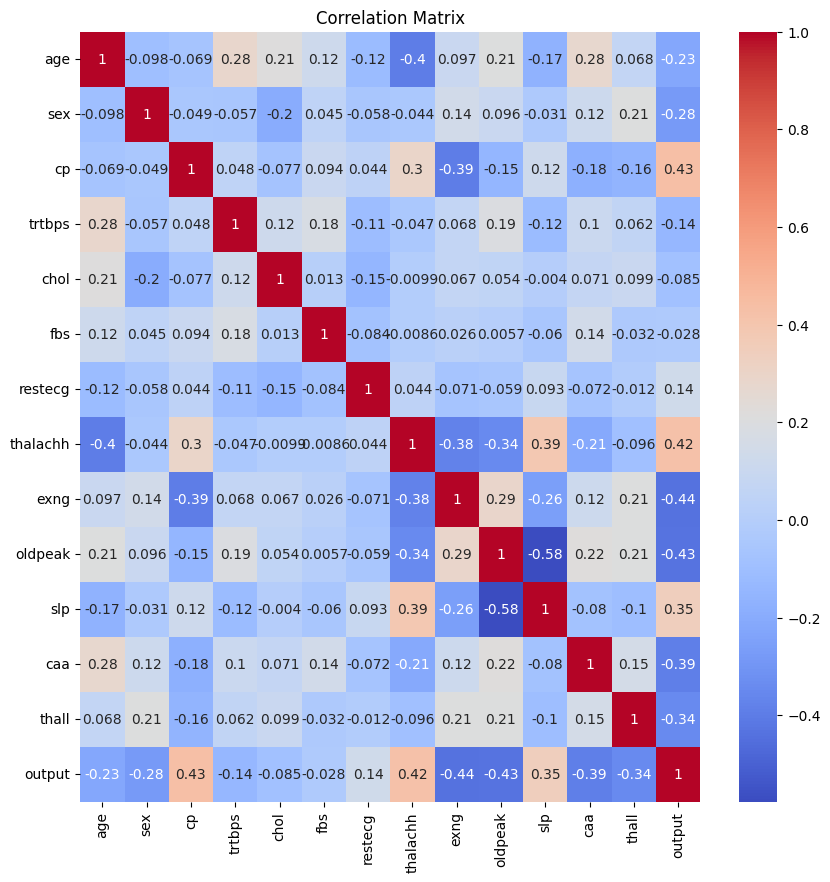

In [8]:
# Explore correlations between features
plt.figure(figsize=(10,10))
sns.heatmap( df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  Model Building

In [9]:
# Split the data into features (X) and target variable (y)
X = df.drop(target, axis=1)
y = df[target]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [11]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns=X.columns)

This dataset contains some outliers. For proper scaling, I'll use the RobustScaler.

The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.

In [12]:
# Scale features
scaler = RobustScaler()
X_train[cols2scale] = scaler.fit_transform(X_train[cols2scale])
X_test[cols2scale] = scaler.transform(X_test[cols2scale])

Pick top features.

Should use this cell when the number of features is over 20.

In [13]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc.feature_importances_})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(14)
print(top_features)
X_train=X_train[top_features['Feature']]
X_test=X_test[top_features['Feature']]

     Feature  Importance
9    oldpeak    0.128485
7   thalachh    0.119725
11       caa    0.115533
2         cp    0.103792
12     thall    0.093300
0        age    0.092811
3     trtbps    0.077537
8       exng    0.075809
4       chol    0.074812
10       slp    0.051058
1        sex    0.035658
6    restecg    0.019782
5        fbs    0.011698


In [14]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier(random_state=42,max_iter=4000) 
}

accuracies={} # Dictionary to store accuracies
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred).round(2)
    accuracies[name] = accuracy # Stored under the model's name
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Convert the accuracies dictionary to a DataFrame
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])



Training Logistic Regression...
Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Training Decision Tree...
Decision Tree Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Training Random Forest...
Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32


# Model Comparison

In [15]:
# Create a horizontal bar plot for accuracies
px.bar(accuracies_df.sort_values('Accuracy'),x='Accuracy',y='Model', orientation='h',title='Accuracy of Different Models')

# Concusion
The best performing model in this dataset is KNN with 90% accuracy. 

This notebook is more of an automated workflow for binary classification tasks including basic EDA, feature importances and model comparison. 